In [1]:
 %matplotlib inline
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

## The Dataset is read from saved pickle object dataframe.pkl
    1. The column CURRENT LOAN DELINQUENCY STATUS is measure of no of days a loan is behind , hence non-performing.
    2. The following exercise plots the values of a feature against the CURRENT LOAN DELINQUENCY STATUS to see the   relationships.

#### Get dataframe for pickle object

In [2]:
dfWithG=pd.read_pickle('data/dataframe.pkl')
dfWithG2=pd.read_pickle('data/dataframe.pkl')
dfWithG.groupby('year').size()

year
2010    2519723
2011    2749706
2012    2206025
2013    1595337
2014     347136
dtype: int64

#### Measure data for each year-quarter time period.

In [3]:
dfWithG.groupby(['year','quarter']).size()

year  quarter
2010  1          243071
      2          764464
      3          771469
      4          740719
2011  1          710594
      2          700031
      3          685909
      4          653172
2012  1          611617
      2          570463
      3          533066
      4          490879
2013  1          449137
      2          410157
      3          377198
      4          358845
2014  1          347136
dtype: int64

#### Peek into data

In [4]:
dfWithG.head()

,LOAN SEQUENCE NUMBER,MONTHLY REPORTING PERIOD,CURRENT ACTUAL UPB,CURRENT LOAN DELINQUENCY STATUS,REMAINING MONTHS TO LEGAL MATURITY,REPURCHASE FLAG,MODIFICATION FLAG,ZERO BALANCE CODE,CURRENT INTEREST RATE,CURRENT DEFERRED UPB,year,quarter,CREDIT SCORE,FIRST TIME HOMEBUYER FLAG,MORTGAGE INSURANCE PERCENTAGE,CLTV,DTI Ratio,change-current,change-chained
0,F110Q1000001,2010-02-01,0.0,0,360,F,N,00,4.875,0.0,2010,1,777,N,000,43.0,26.0,3.0,1.6
1,F110Q1000001,2010-03-01,0.0,0,359,F,N,00,4.875,0.0,2010,1,777,N,000,43.0,26.0,3.0,1.6
2,F110Q1000003,2010-02-01,0.0,0,360,F,N,00,4.875,0.0,2010,1,727,N,000,61.0,26.0,3.0,1.6
3,F110Q1000003,2010-03-01,0.0,0,359,F,N,00,4.875,0.0,2010,1,727,N,000,61.0,26.0,3.0,1.6
4,F110Q1000004,2010-03-01,0.0,0,360,F,N,00,4.875,0.0,2010,1,794,N,000,58.0,31.0,3.0,1.6


### Get data for a given year quarter 

In [5]:
dfWithG=dfWithG[(dfWithG['year']==2013) & (dfWithG['quarter']==4)]

#### CREDIT SCORE and LOAN DELINQUENCY STATUS relationship

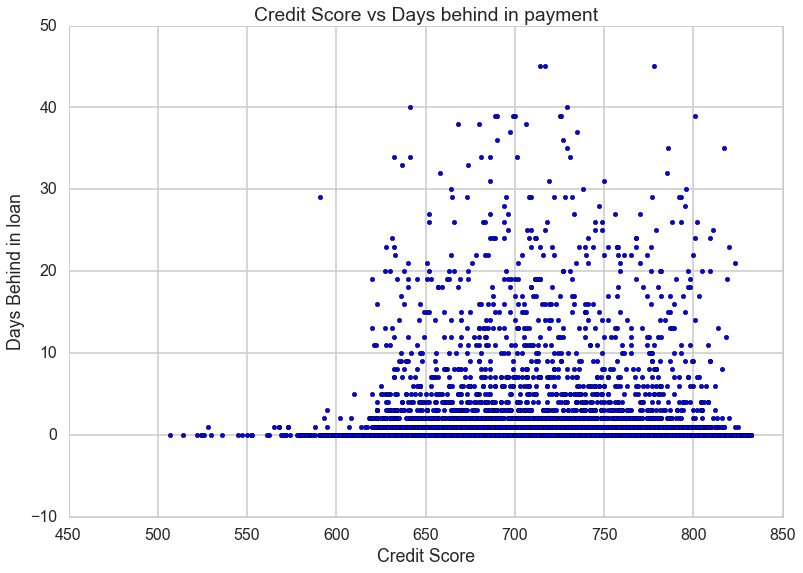

In [6]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','CREDIT SCORE','CURRENT LOAN DELINQUENCY STATUS']]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df3=df2.reset_index()
#df3=df3.sample(frac=.50)
plt.scatter(df3['CREDIT SCORE'],df3['CURRENT LOAN DELINQUENCY STATUS'])
plt.xlabel('Credit Score')
plt.ylabel('Days Behind in loan')
plt.title('Credit Score vs Days behind in payment')
plt.xlim(400,850)
plt.autoscale()

#### Combined Loan to Value Ratio and LOAN DELINQUENCY STATUS relationship

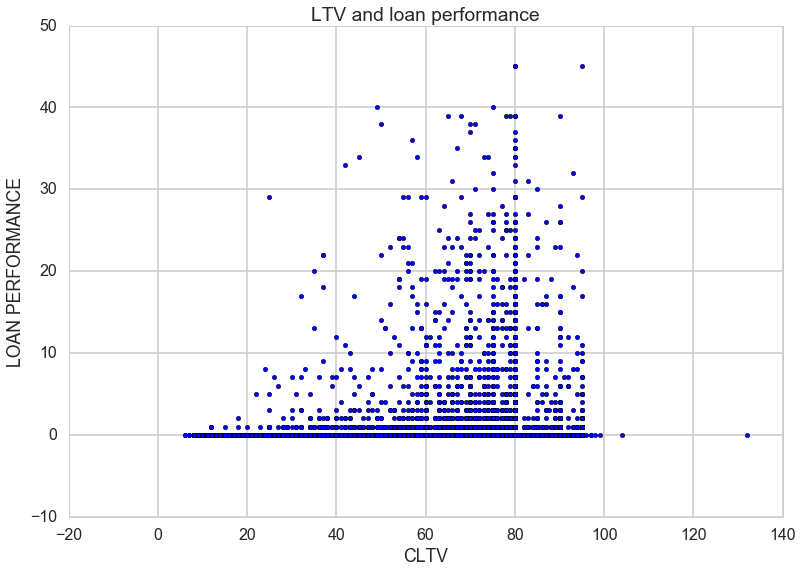

In [7]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','CLTV','CURRENT LOAN DELINQUENCY STATUS']]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df3=df2.reset_index()
plt.scatter(df3['CLTV'],df3['CURRENT LOAN DELINQUENCY STATUS'])
plt.xlabel('CLTV')
plt.ylabel('LOAN PERFORMANCE')
plt.title('LTV and loan performance')
#plt.xlim(400,850)
plt.autoscale()


#### REMAINING MONTHS and LOAN DELINQUENCY STATUS relationship

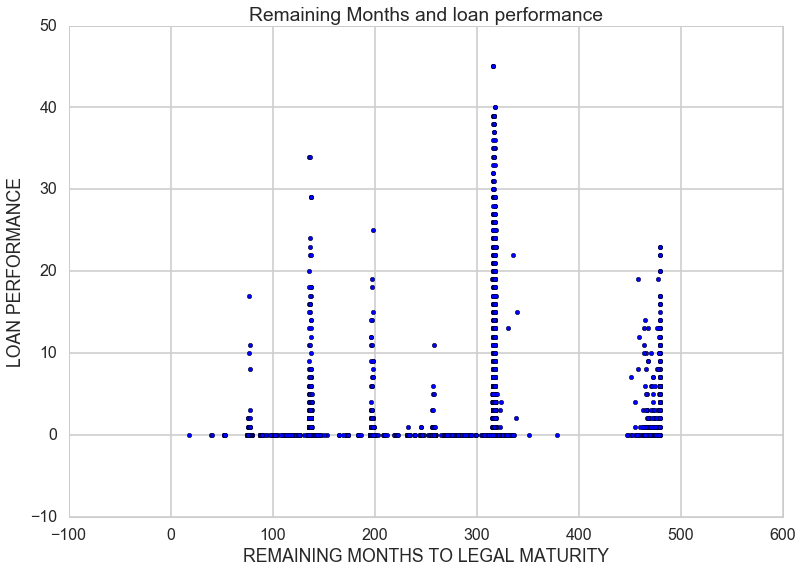

In [8]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','REMAINING MONTHS TO LEGAL MATURITY','CURRENT LOAN DELINQUENCY STATUS']]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df3=df2.reset_index()
plt.scatter(df3['REMAINING MONTHS TO LEGAL MATURITY'],df3['CURRENT LOAN DELINQUENCY STATUS'])
plt.xlabel('REMAINING MONTHS TO LEGAL MATURITY')
plt.ylabel('LOAN PERFORMANCE')
plt.title('Remaining Months and loan performance')
#plt.xlim(400,850)
#plt.xlim(400,850)
plt.autoscale()

#### Unpaid Balance and LOAN DELINQUENCY STATUS relationship

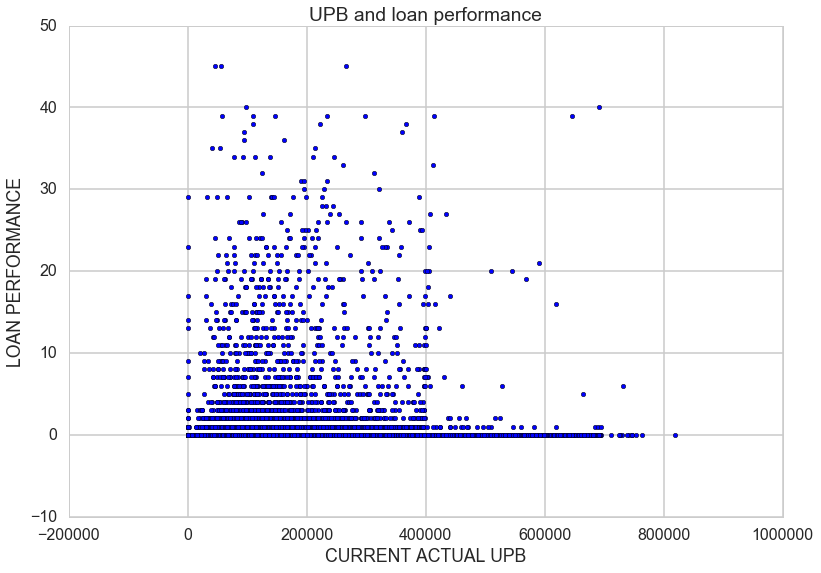

In [9]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','CURRENT ACTUAL UPB','CURRENT LOAN DELINQUENCY STATUS']]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df3=df2.reset_index()
plt.scatter(df3['CURRENT ACTUAL UPB'],df3['CURRENT LOAN DELINQUENCY STATUS'])
plt.xlabel('CURRENT ACTUAL UPB')
plt.ylabel('LOAN PERFORMANCE')
plt.title('UPB and loan performance')
#plt.xlim(400,850)
plt.autoscale()

#### Interest Rate and LOAN DELINQUENCY STATUS relationship

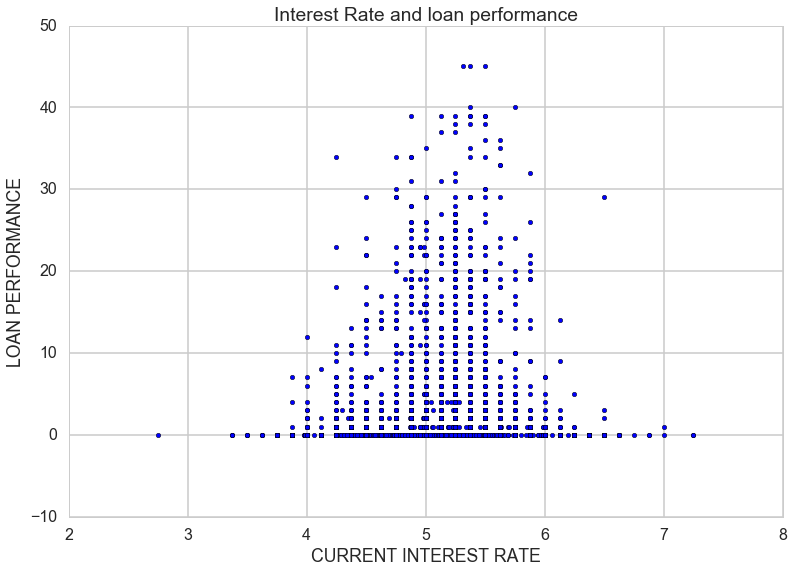

In [10]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','CURRENT INTEREST RATE','CURRENT LOAN DELINQUENCY STATUS']]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df3=df2.reset_index()
plt.scatter(df3['CURRENT INTEREST RATE'],df3['CURRENT LOAN DELINQUENCY STATUS'])
plt.xlabel('CURRENT INTEREST RATE')
plt.ylabel('LOAN PERFORMANCE')
plt.title('Interest Rate and loan performance')
#plt.xlim(400,850)
plt.autoscale()

#### Debt to Income Ratio and LOAN DELINQUENCY STATUS relationship

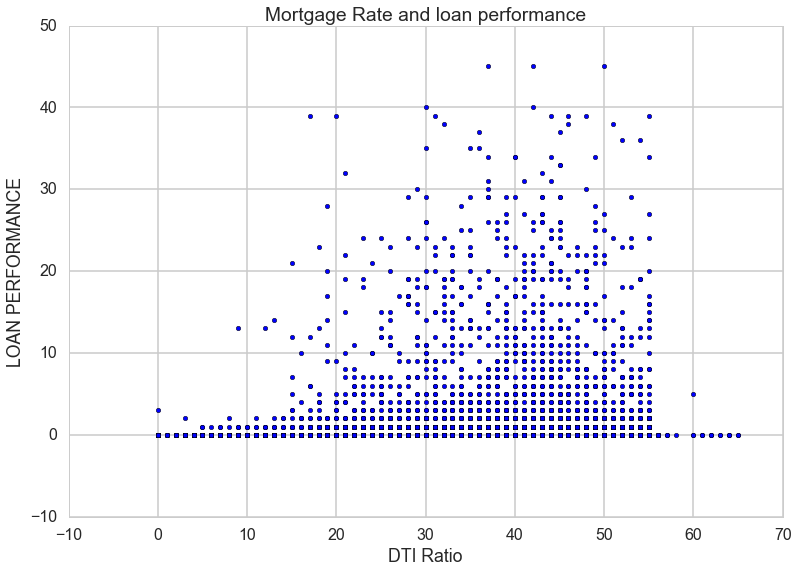

In [11]:

df1=dfWithG[['LOAN SEQUENCE NUMBER','DTI Ratio','CURRENT LOAN DELINQUENCY STATUS']]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df3=df2.reset_index()
plt.scatter(df3['DTI Ratio'],df3['CURRENT LOAN DELINQUENCY STATUS'])
plt.xlabel('DTI Ratio')
plt.ylabel('LOAN PERFORMANCE')
plt.title('Mortgage Rate and loan performance')
#plt.xlim(400,850)
plt.autoscale()

#### GDP -Current and LOAN DELINQUENCY STATUS relationship. For this we take the whole data for all years and quaters

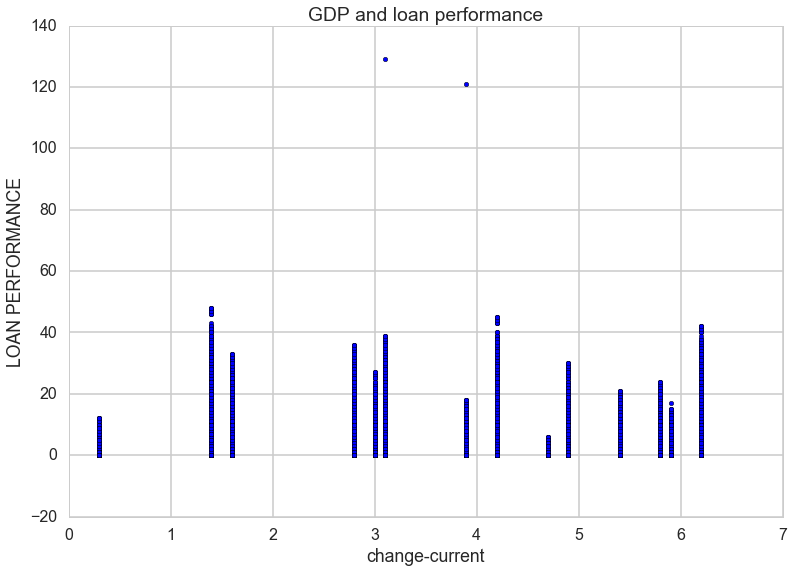

In [12]:
df1=dfWithG2[['LOAN SEQUENCE NUMBER','change-current','CURRENT LOAN DELINQUENCY STATUS']]
#df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
#df3=df2.reset_index()
plt.scatter(df1['change-current'],df1['CURRENT LOAN DELINQUENCY STATUS'])
plt.xlabel('change-current')
plt.ylabel('LOAN PERFORMANCE')
plt.title('GDP and loan performance')
#plt.xlim(400,850)
plt.autoscale()

#### Repurchase Flag and LOAN DELINQUENCY STATUS relationship

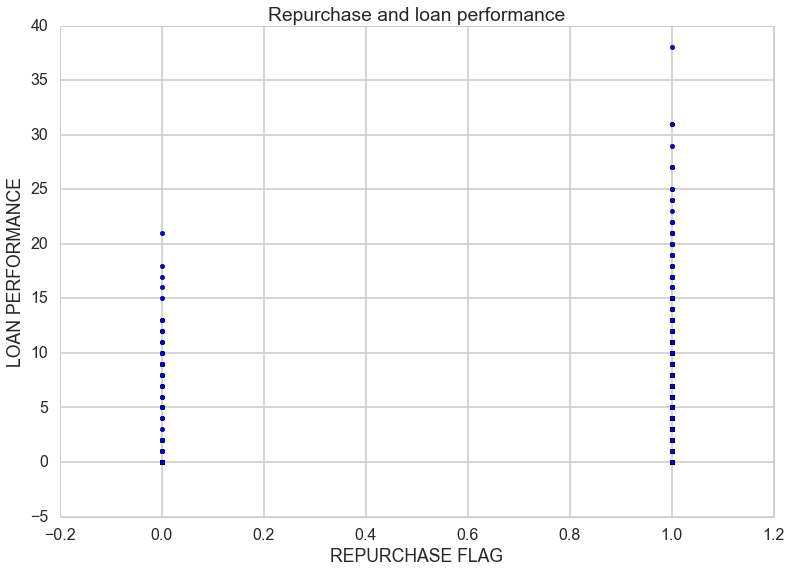

In [13]:
df1=dfWithG2[['LOAN SEQUENCE NUMBER','REPURCHASE FLAG','CURRENT LOAN DELINQUENCY STATUS']]
df1=df1[df1['REPURCHASE FLAG'] !='F']
df1['REPURCHASE FLAG']=[0 if x=='Y' else 1 for x in df1['REPURCHASE FLAG']]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
#df2.head()
df3=df2.reset_index()
#df3.head()
plt.scatter(df3['REPURCHASE FLAG'],df3['CURRENT LOAN DELINQUENCY STATUS'])
plt.xlabel('REPURCHASE FLAG')
plt.ylabel('LOAN PERFORMANCE')
plt.title('Repurchase and loan performance')
#plt.xlim(400,850)
plt.autoscale()

#### Mondification Flag and LOAN DELINQUENCY STATUS relationship

/Users/shashankshrivastava/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


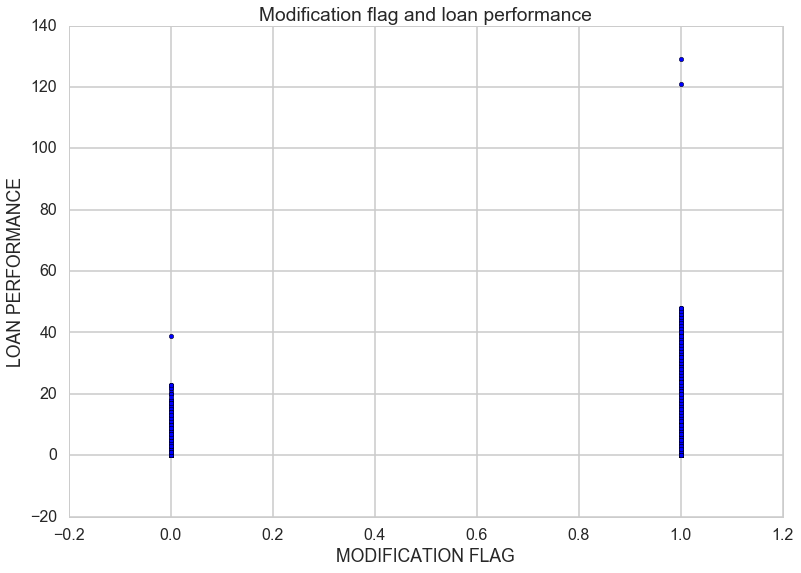

In [14]:
df1=dfWithG2[['LOAN SEQUENCE NUMBER','MODIFICATION FLAG','CURRENT LOAN DELINQUENCY STATUS']]
df1['MODIFICATION FLAG 2']=[0 if x=='Y' else 1 for x in df1['MODIFICATION FLAG']]
#df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
#df2.head()
#df3=df2.reset_index()
#df3.head()
plt.scatter(df1['MODIFICATION FLAG 2'],df1['CURRENT LOAN DELINQUENCY STATUS'])
plt.xlabel('MODIFICATION FLAG')
plt.ylabel('LOAN PERFORMANCE')
plt.title('Modification flag and loan performance')